## The Adult Dataset (Binary Classification with Synthetic Data)
The adult dataset is a classic imbalanced classification task dataset. The final column specifies whether the person makes <= 50k a year, or more.

Here we see MWEM stretched - we are forced to carefully select our feature dependence (via the "splits" feature) to acheive a reasonable data synthesis.

We show that by either specifying a max_bin_count, or by dropping continuous columns, we can greatly speed up performance.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import RidgeClassifier

import utils

from opendp.smartnoise.synthesizers.mwem import MWEMSynthesizer

from load_data import load_data

In [2]:
datasets = load_data(['adult'])

adult = datasets['adult']['data']
adult_cat_ord = datasets['adult']['data'].copy()

cat_ord_columns = ['workclass',
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race',
                       'gender',
                       'native-country',
                       'income',
                       'education',
                       'age',
                       'education-num',
                       'hours-per-week',
                  'earning-class']

for c in adult_cat_ord.columns.values:
    if not c in cat_ord_columns:
        adult_cat_ord = adult_cat_ord.drop([c], axis=1)

Memory consumed by adult:3907448
Memory use too high with adult, subsampling to:1500000
Memory consumed by adult:1599872


In [3]:
synth = MWEMSynthesizer(500, 0.1, 30, 15, splits=[[0,1,2],[3,4,5],[6,7,8],[9,10],[11,12],[13,14]], max_bin_count=400)
synth.fit(datasets['adult']['data'])

synth_cat_ord = MWEMSynthesizer(500, 0.1, 30, 15, split_factor=3)
synth_cat_ord.fit(adult_cat_ord)

Initializing iteration with columns [0, 1, 2]


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 1472421 in column: 2 exceeds max_bin_count, defaulting to: 400. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 100000 in column: 10 exceeds max_bin_count, defaulting to: 400. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 4357 in column: 11 exceeds max_bin_count, defaulting to: 400. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \


Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [3, 4, 5]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [6, 7, 8]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [9, 10]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [11, 12]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [13, 14]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [0 1 2]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [3 4 5]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [6 7 8]
Estimate duration till completion: 0.0 seconds (lower bound)
Initializing iteration with columns [ 9 10]
Estimate duration till completion: 0.0 seconds (l

In [4]:
sample_size = len(adult)
synthetic = synth.sample(int(sample_size))
synthetic_cat_ord = synth_cat_ord.sample(int(sample_size))


Trained on Real Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1874
           1       0.74      0.32      0.45       626

    accuracy                           0.80      2500
   macro avg       0.78      0.64      0.66      2500
weighted avg       0.79      0.80      0.77      2500

Accuracy real: 0.802

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1874
           1       0.19      0.07      0.10       626

    accuracy                           0.70      2500
   macro avg       0.47      0.49      0.46      2500
weighted avg       0.61      0.70      0.64      2500

Accuracy synthetic: 0.696

Random Guessing
              precision    recall  f1-score   support

           0       0.44      0.51      0.47      1049
           1       0.60      0.53      0.56      1451

    accuracy                           0.52      2500
   macro avg   

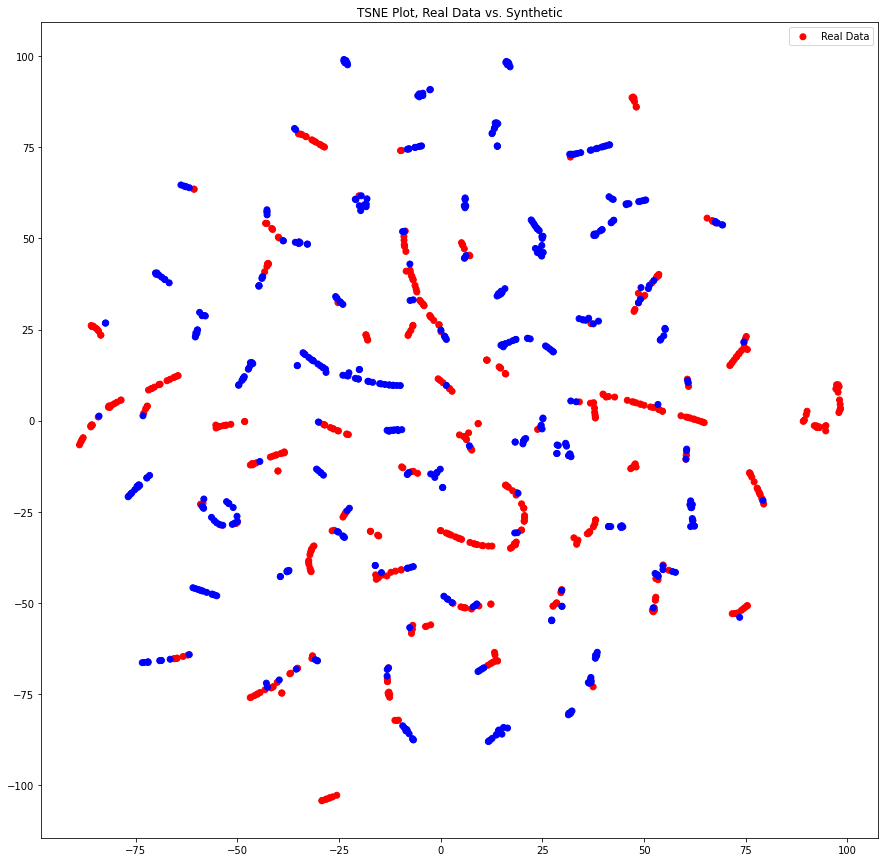

                age     workclass        fnlwgt     education  education-num  \
count  12499.000000  12499.000000  1.249900e+04  12499.000000   12499.000000   
mean      38.571806      3.873910  1.904674e+05     10.344028      10.108089   
std       13.576400      1.444589  1.075678e+05      3.800711       2.572473   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.177055e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783410e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.377350e+05     12.000000      13.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    12499.000000  12499.000000  12499.000000  12499.000000  12499.000000   
mean         2.616609      6.626130      1.446676      3.670134      0.666373   
std          1.502033      4.223814 

(RidgeClassifier(), RidgeClassifier())

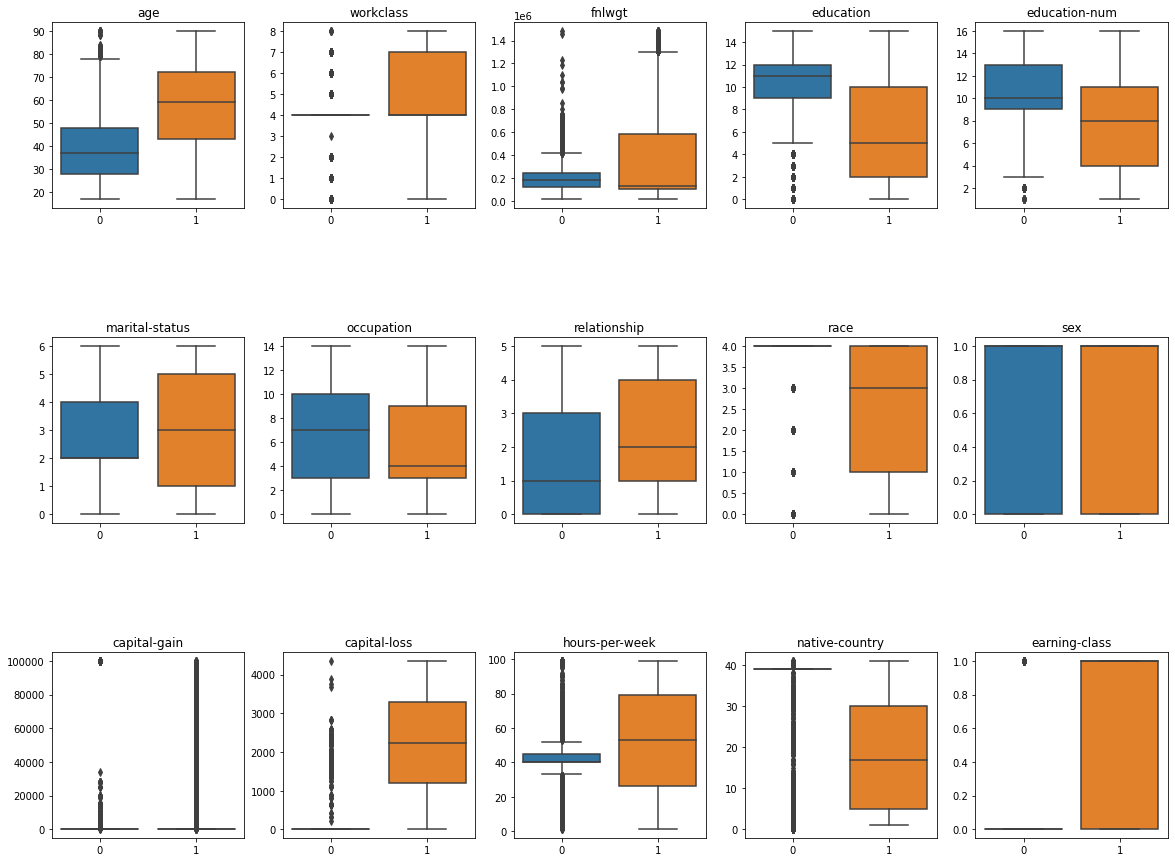

In [5]:
utils.test_real_vs_synthetic_data(adult, synthetic, RidgeClassifier, tsne=True, box=True, describe=True)


Trained on Real Data
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1874
           1       0.41      0.78      0.54       626

    accuracy                           0.67      2500
   macro avg       0.65      0.70      0.64      2500
weighted avg       0.77      0.67      0.69      2500

Accuracy real: 0.6664

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1874
           1       0.26      0.05      0.09       626

    accuracy                           0.72      2500
   macro avg       0.50      0.50      0.46      2500
weighted avg       0.63      0.72      0.65      2500

Accuracy synthetic: 0.7248

Random Guessing
              precision    recall  f1-score   support

           0       0.48      0.49      0.49      1246
           1       0.49      0.48      0.48      1254

    accuracy                           0.48      2500
   macro avg 

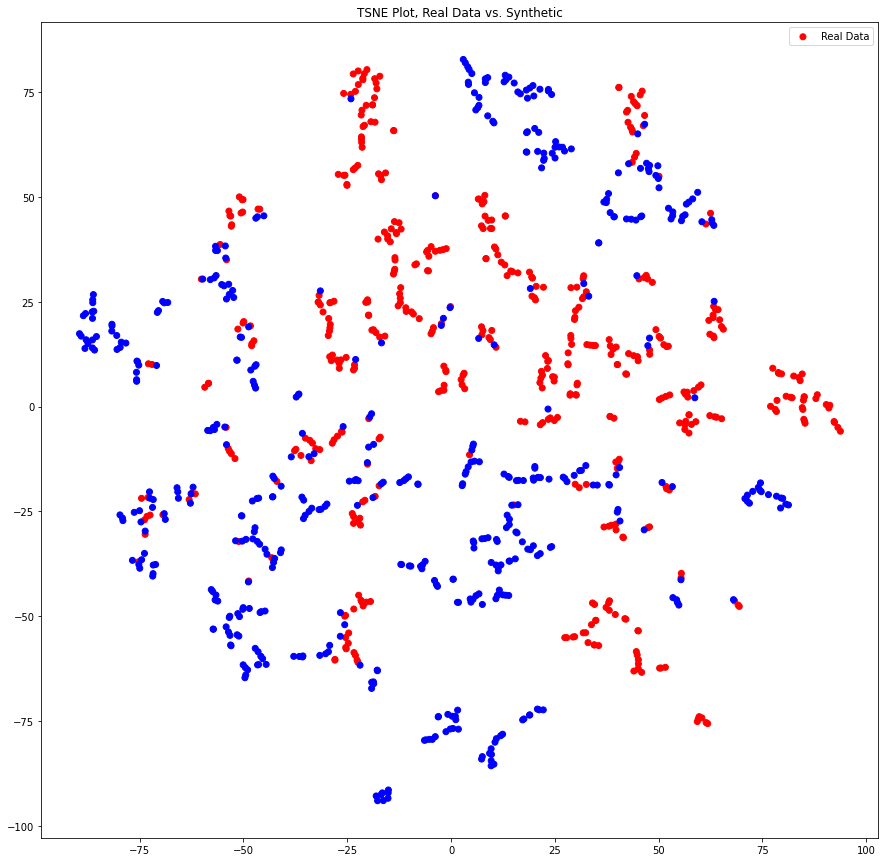

                age     workclass     education  education-num  \
count  12499.000000  12499.000000  12499.000000   12499.000000   
mean      38.571806      3.873910     10.344028      10.108089   
std       13.576400      1.444589      3.800711       2.572473   
min       17.000000      0.000000      0.000000       1.000000   
25%       28.000000      4.000000      9.000000       9.000000   
50%       37.000000      4.000000     11.000000      10.000000   
75%       48.000000      4.000000     12.000000      13.000000   
max       90.000000      8.000000     15.000000      16.000000   

       marital-status    occupation  relationship          race  \
count    12499.000000  12499.000000  12499.000000  12499.000000   
mean         2.616609      6.626130      1.446676      3.670134   
std          1.502033      4.223814      1.611469      0.844104   
min          0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000   
50%

(ComplementNB(), ComplementNB())

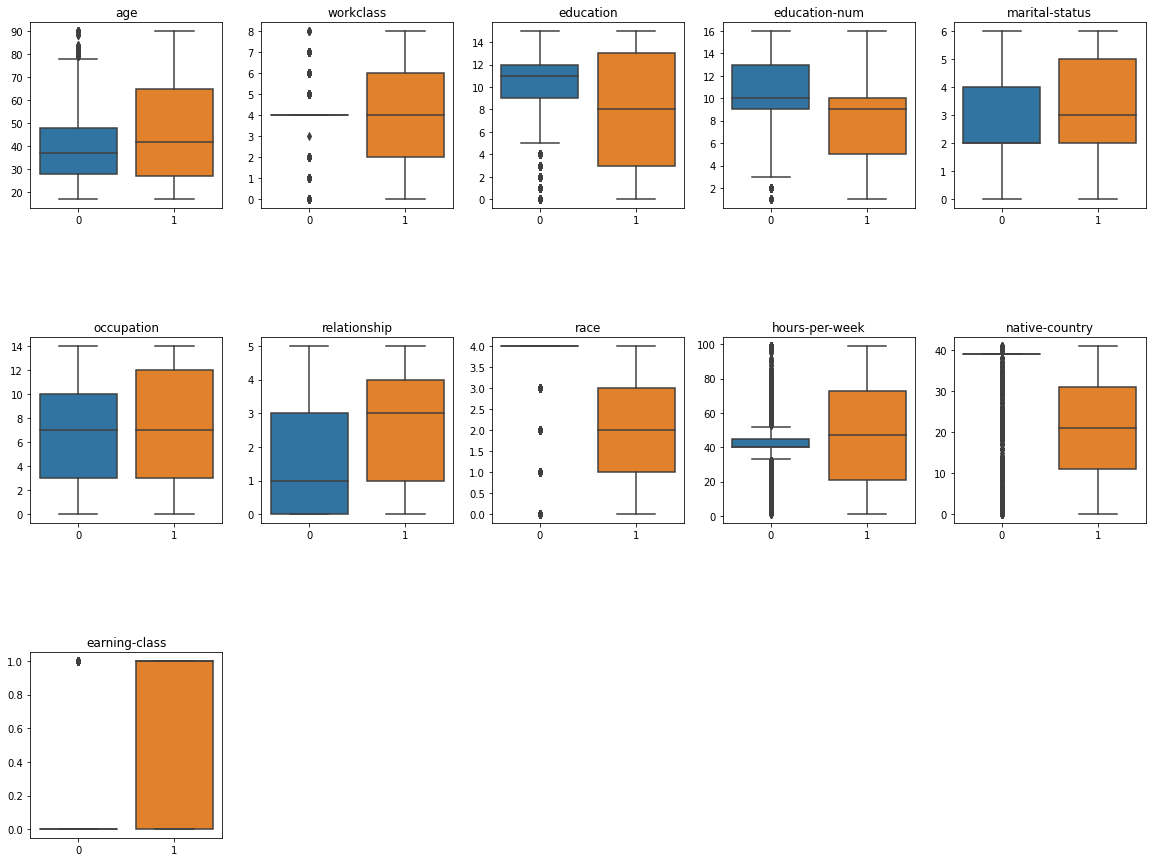

In [6]:
utils.test_real_vs_synthetic_data(adult_cat_ord, synthetic_cat_ord, ComplementNB, tsne=True, box=True, describe=True)